Import required dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import gdown
import glob
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!7z x '/content/drive/MyDrive/Colab Notebooks/Datasets/Real-World-Masked-Face-Dataset-master.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 187072300 bytes (179 MiB)

Extracting archive: /content/drive/MyDrive/Real-World-Masked-Face-Dataset-master.zip
--
Path = /content/drive/MyDrive/Real-World-Masked-Face-Dataset-master.zip
Type = zip
Physical Size = 187072300
Comment = 241679901f6b95394b264cfbfd9f434c4139ec25

  0%     21% 3 - Real-World-Masked-Face-Dataset-master/RMFD_part_2.part2.rar                                                                     22% 3 - Real-World-Masked-Face-Dataset-master/RMFD_part_2.part2.

In [ ]:
!7z x '/content/drive/MyDrive/self-built-masked-face-recognition-dataset.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 636274634 bytes (607 MiB)

Extracting archive: /content/drive/MyDrive/self-built-masked-face-recognition-dataset.zip
  6% 4096 Open               31% 20480 Open               --
Path = /content/drive/MyDrive/self-built-masked-face-recognition-dataset.zip
Type = zip
Physical Size = 636274634
64-bit = +

  0%      0% 850 - self-built-masked-face-recogn . ting/1_0_baijingting_0040.jpg                                                                        

In [ ]:
!unrar x '/content/Real-World-Masked-Face-Dataset-master/RMFD_part_2.part1.rar' '/content/Real-World-Masked-Face-Dataset-master/'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Real-World-Masked-Face-Dataset-master/RMFD_part_2.part1.rar

Creating    /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro  OK
Creating    /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000  OK
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/000.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/001.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/002.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/003.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/004.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00000/005.jpg       0%  OK 
E

In [ ]:
!unrar x '/content/Real-World-Masked-Face-Dataset-master/RMFD_part_3.part1.rar' '/content/Real-World-Masked-Face-Dataset-master'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Real-World-Masked-Face-Dataset-master/RMFD_part_3.part1.rar

Creating    /content/Real-World-Masked-Face-Dataset-master/single2-0  OK
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/1.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/10.jpg       0%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/100.jpg       1%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/101.jpg       8%  9%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/102.jpg      16% 17%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/103.jpg      17%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/single2-0/104.jpg      18%  OK 
Extracting  /content/Real-World-Masked-Face-Dataset-master/

In [ ]:
imgs = cv2.imread('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/anhu/0_0_5.jpg')

In [ ]:
img = cv2.imread('/content/Real-World-Masked-Face-Dataset-master/single2-0/1.jpg')

In [ ]:
paths = ['/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/*/*.jpg','/content/Real-World-Masked-Face-Dataset-master/single2-0/*.jpg',
         '/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_1/*/*.jpg','/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/*/*.jpg',
         '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/*/*.jpg']

Preprocessing of the given image data sets

In [ ]:
list1 = []
list2 = []
for j in range(4):
  for i in glob.glob(paths[j]):
    list1.append(i)

In [ ]:
for j in glob.glob(paths[-1]):
  list2.append(j)
list1 = sorted(list1)
list2 = sorted(list2)

Data Vizualization

In [ ]:
col = 8
row = 4

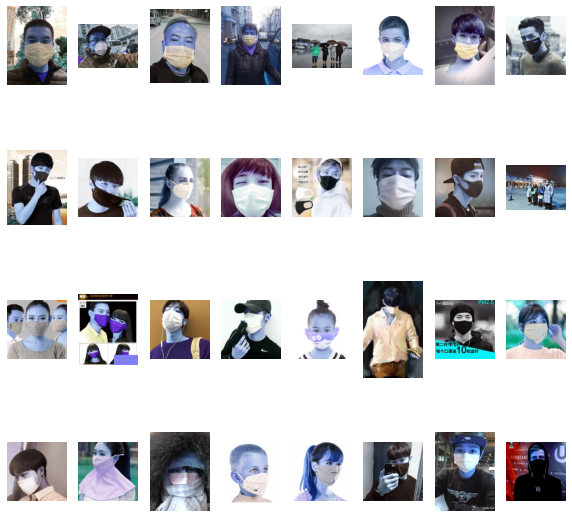

In [ ]:
f = plt.figure(figsize=(10,10))
for i in range(1, col*row +1):
    imgs = cv2.imread(list1[i])
    f.add_subplot(row, col, i)
    plt.axis('off')
    plt.imshow(imgs)
plt.show()

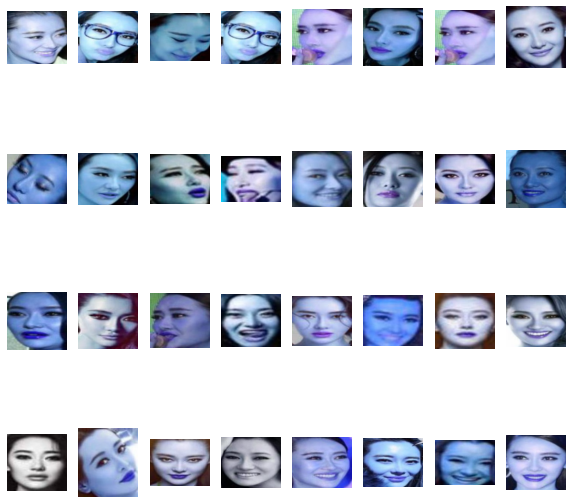

In [ ]:
f = plt.figure(figsize=(10,10))
for i in range(1, col*row +1):
    imgs = cv2.imread(list2[i])
    f.add_subplot(row, col, i)
    plt.axis('off')
    plt.imshow(imgs)
plt.show()

In [ ]:
targets = []
for i in range(len(list2)+len(list2)):
  if i > len(M):
    targets.append(0)
  else:
    targets.append(1)

In [ ]:
imgdataset= pd.DataFrame({'Image':np.cncatenate([(list1),(list2)]),'Target':targets})

In [ ]:
imgdataset.head()

,Image,Target
0,/content/Real-World-Masked-Face-Dataset-master...,1
1,/content/Real-World-Masked-Face-Dataset-master...,1
2,/content/Real-World-Masked-Face-Dataset-master...,1
3,/content/Real-World-Masked-Face-Dataset-master...,1
4,/content/Real-World-Masked-Face-Dataset-master...,1


In [ ]:
Mean = 0
SD = 0
A = 0
B = 0
for i in imgdataset.values:
  p = i[0]
  image = cv2.imread(p)
  try:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h,w,f = image.shape
    A = A + h
    B = B + w
    image = image.reshape(-1,3)
    SD = np.std(image, axis = 0)/255 + SD
    Mean = np.mean(image, axis =0)/255 + Mean
  except:
    print(p)

In [ ]:
Mean = Mean/len(imgdataset.values)
SD = SD/len(imgdataset.values)
A = A/len(imgdataset.values)
B = B/len(imgdataset.values)

In [ ]:
print("Mean: ", Mean )
print("Standard Deviation: ", SD)
print(A, B)

Mean:  [0.00028079 0.00024422 0.00022936]
Standard Deviation:  [0.00013011 0.00012247 0.00011737]
171.9955 193.362


In [ ]:
X = imgdataset.drop('Target', axis=1)
Y = imgdataset[['Target']]

In [ ]:
i = imgdataset[(imgdataset.Image == '/content/Real-World-Masked-Face-Dataset-master/RWMFD_part_2_pro/00415/011.jpg' )].index
imgdataset = imgdataset.drop(i)

In [ ]:
from sklearn.preprocessing import StandardScaler
Label_r = StandardScaler().fit_transform(Label_r)
data_val = pd.DataFrame(Label_r, columns = [i for i in range(91875)])

In [ ]:
data_val['Target'] = P_.values.ravel()
data_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91836,91837,91838,91839,91840,91841,91842,91843,91844,91845,91846,91847,91848,91849,91850,91851,91852,91853,91854,91855,91856,91857,91858,91859,91860,91861,91862,91863,91864,91865,91866,91867,91868,91869,91870,91871,91872,91873,91874,Target
0,1.564006,1.624905,1.619572,1.581191,1.640748,1.637188,1.578728,1.644152,1.649344,1.591168,1.652685,1.658920,1.582236,1.658293,1.660480,1.586756,1.659666,1.665026,1.603232,1.678499,1.668907,1.612033,1.683962,1.677684,1.621064,1.693983,1.684379,1.639967,1.709944,1.699960,1.665809,1.736977,1.713394,1.684050,1.754701,1.734876,1.681652,1.759028,1.749934,1.693770,...,-0.011390,-0.141672,-0.166886,-0.024359,-0.180636,-0.191930,0.097336,-0.082119,-0.097088,0.178506,-0.002881,-0.019688,0.179182,0.023220,0.003940,0.205480,0.073829,0.042951,0.104119,-0.039463,-0.043139,0.076731,-0.043093,-0.044982,0.054957,-0.025948,-0.041384,0.041561,-0.014870,-0.030484,0.006225,-0.049282,-0.066788,0.092564,0.037382,0.016878,0.049171,-0.007713,-0.026346,1
1,1.457329,1.458274,1.475082,1.498118,1.509756,1.504623,1.566869,1.572697,1.516767,1.437147,1.438712,1.370373,1.287056,1.255806,1.181486,0.986541,0.940057,0.888924,1.003783,0.948435,0.941849,1.094809,1.024670,1.045959,1.385179,1.316244,1.338153,1.651829,1.591228,1.592133,1.653907,1.617949,1.569269,1.648167,1.622997,1.553582,1.609677,1.578635,1.506893,1.681743,...,1.731899,1.824676,1.771229,1.675929,1.763097,1.712481,1.626735,1.690571,1.652557,1.624141,1.684941,1.647237,1.660720,1.725744,1.682408,1.637310,1.700826,1.664399,1.668371,1.759844,1.707337,1.653469,1.746864,1.701452,1.620729,1.716849,1.668805,1.691639,1.786845,1.736011,1.750723,1.850372,1.791676,1.677109,1.774084,1.713997,1.607836,1.702265,1.639473,1
2,1.386212,0.791749,0.283033,1.343841,0.747620,0.239231,1.400834,0.810518,0.299468,1.377908,0.784903,0.276296,1.440549,0.853319,0.355222,1.410222,0.822089,0.327742,1.450431,0.889559,0.393576,1.423951,0.859847,0.366556,1.479533,0.914896,0.418862,1.485759,0.914549,0.418020,1.522981,0.975197,0.476321,1.504636,0.952506,0.453731,1.549698,1.013407,0.486119,1.537420,...,2.261954,2.289449,2.059639,2.266307,2.299710,2.104905,2.278804,2.313408,2.162388,2.305142,2.335958,2.195108,2.305905,2.341550,2.195274,2.305498,2.339573,2.200993,2.330170,2.367718,2.224256,2.315458,2.367870,2.220662,2.278114,2.334089,2.184204,2.285192,2.327359,2.189257,2.312308,2.358559,2.212460,2.289320,2.369178,2.205577,2.314106,2.403480,2.277446,1
3,-0.439139,-0.148528,-0.030030,-0.424418,-0.133600,-0.013847,-0.401828,-0.106479,0.010208,-0.375563,-0.082879,0.035840,-0.342338,-0.046357,0.067826,-0.296271,-0.003692,0.112821,-0.265638,0.029968,0.143278,-0.221760,0.071051,0.187766,-0.148077,0.147613,0.263657,-0.056322,0.237870,0.358116,0.059000,0.356251,0.476321,0.129130,0.425691,0.550421,0.170184,0.472230,0.595488,0.214463,...,0.035726,0.025169,0.063842,0.034679,0.034009,0.050450,0.500434,0.504785,0.505439,0.704191,0.708415,0.703035,0.418140,0.445832,0.446869,-0.283729,-0.263622,-0.237011,-0.521582,-0.501447,-0.466073,-0.151957,-0.128329,-0.103984,0.509151,0.542881,0.544297,0.552016,0.585701,0.585465,0.197403,0.204812,0.213735,0.416675,0.450304,0.449936,1.072045,1.099467,1.096014,1
4,1.646976,1.660612,1.619572,1.664263,1.688382,1.637188,1.673605,1.703697,1.613187,1.685950,1.712122,1.610829,1.688501,1.717482,1.624555,1.692676,1.718651,1.629206,1.697263,1.725600,1.668907,1.682563,1.731054,1.677684,1.668242,1.729396,1.684379,1.663691,1.745558,1.699960,1.725320,1.772685,1.713394,1.731893,1.790620,1.710704,1.765622,1.807132,1.664869,1.645662,...,2.038153,1.777007,1.113655,2.006541,1.775021,1.135387,2.065400,1.906168,1.281771,2.078142,1.914003,1.320846,2.162531,1.979311,1.402664,2.126519,1.941862,1.372772,2.209843,2.015151,1.413633,2.146952,1.953866,1.359245,2.110779,1.946801,1.352537,2.059642,1.882936,1.317631,2.049439,1.838272,1.300761,1.881179,1.676926,1.175601,1.644367,1.456225,1.001500,1


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components = 1)
LDA.fit(Label_r,P_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
Label = []
for i in imgdataset_val.values:
  j = cv2.imread(i[0])
  j.resize(175,175,3)
  Label.append(j)

Label = np.array(Label)
Label_r = np.reshape(Label, (Label.shape[0], -1))
Label_r.shape
P_ = imgdataset_val[['Target']]

In [ ]:
Label_r = Label_r/255

In [ ]:
lda = LDA.transform(Label_r)
lda_val = pd.DataFrame(data = lda,columns = ['F1'])
lda_val['Target'] = P_
lda_val

,F1,Target
0,5.174655,1
1,7.326793,1
2,5.151064,1
3,4.438098,1
4,3.674023,1
...,...,...
995,-4.079319,0
996,-6.017567,0
997,-4.179420,0
998,-4.182888,0


In [ ]:
from sklearn.model_selection import train_test_split
X_val, X_test, Y_val, Y_test = train_test_split(lda, P_, test_size=0.5)

In [ ]:
X = []
for i in imgdataset.values:
  j = cv2.imread(i[0])
  j.resize(175,175,3)
  X.append(j)

In [ ]:
X = np.array(X)

In [ ]:
X_r = np.reshape(X, (X.shape[0], -1))
X_r.shape
Y_r = imgdataset[['Target']]

In [ ]:
X_r = X_r/255
X_r.shape

(2000, 91875)

In [ ]:
X_r = StandardScaler().fit_transform(X_r)

In [ ]:
imgdataset1 = pd.DataFrame(X_r, columns = [i for i in range(91875)])
imgdataset1['Target'] = Y_r.values.ravel()

In [ ]:
LDA_s = LinearDiscriminantAnalysis(n_components = 1)
LDA_s.fit(X_r,Y_r.values.ravel())

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_r = LDA_s.transform(X_r)
lda_imgdataset1 = pd.DataFrame(data = lda_r,columns = ['F1'])
lda_imgdataset1['Target'] = Y_r
lda_imgdataset1

,F1,Target
0,6.833245,1
1,5.394041,1
2,5.418910,1
3,6.063192,1
4,5.447695,1
...,...,...
1995,-5.250923,0
1996,-5.872519,0
1997,-5.413040,0
1998,-6.410547,0


Classifiers

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(lda_r, Y_r, test_size=0.5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
D = {'kernel': ('linear','poly', 'rbf'), 'C': (0.01,0.1,1,10)}
G = GridSearchCV(SVC(), D)
G.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 10),
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
G.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [ ]:
SVM = G.best_estimator_
SVM.fit(X_train,Y_train.values.ravel())
SVM_pred = SVM.predict(X_test)

In [ ]:
print("Train Accuracy: ",SVM.score(X_train,Y_train))
print("Testing Accuracy: ",SVM.score(X_test,Y_test))

Train Accuracy:  0.998
Testing Accuracy:  0.998


In [ ]:
from sklearn.model_selection import cross_val_score
scs=cross_val_score(SVM,X_val,Y_val.values.ravel(),cv=5,scoring = 'accuracy')
print("Scores of Linear Kernel:",scs)
print("Mean:",scs.mean())

Scores of Linear Kernel: [1.   1.   1.   1.   0.99]
Mean: 0.998


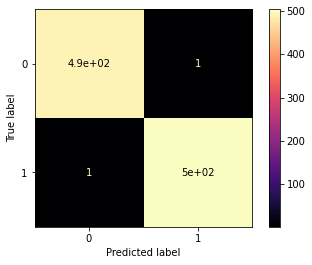

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVM, X_test, Y_test, cmap='magma')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_P = {'n_neighbors':[2,3,4,5],'leaf_size':[3,6,5,4]}
G2 = GridSearchCV(KNeighborsClassifier(), KNN_P)
G2.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [3, 6, 5, 4],
                         'n_neighbors': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
KNN = G2.best_estimator_
KNN.fit(X_train,Y_train.values.ravel())
KNN_pred = KNN.predict(X_test)

In [ ]:
print("Train Accuracy: ", KNN.score(X_train,Y_train))
print("Testing Accuracy: ", KNN.score(X_test,Y_test))

Train Accuracy:  0.998
Testing Accuracy:  0.999


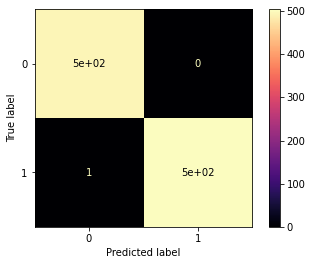

In [ ]:
plot_confusion_matrix(KNN, X_test, Y_test,cmap='magma')

In [ ]:
from sklearn.neural_network import MLPClassifier
M2 = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
M2.predict_proba(X_test[:1])
M2.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.998

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
M1 = LogisticRegression()
M1.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

1


In [ ]:
Y_pred = M1.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.997